Dataset Information:
Number of samples: 178
Number of features: 13
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Setosa
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Setosa
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Setosa
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Setosa
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Setosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,Virginica
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Virginica
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,Virginica
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,Virginica


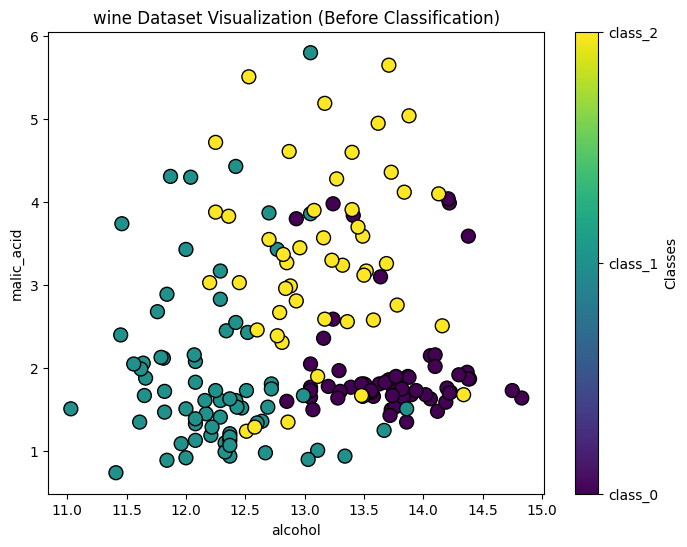

Accuracy of k-NN: 74.07%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



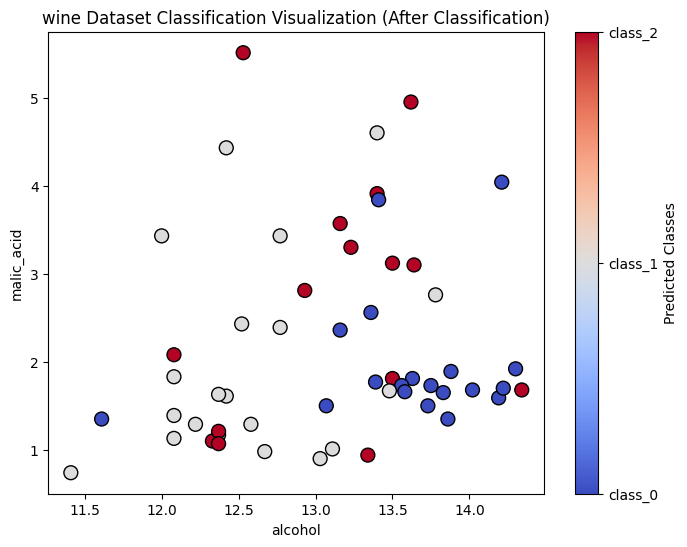

In [ ]:
from sklearn.datasets import load_wine
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the sample dataset (Wine dataset)
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels (target classes)

# Display dataset information
print("Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {wine.feature_names}")
print(f"Target classes: {wine.target_names}")
print(f"Class distribution: {np.bincount(y)}\n")  # Shows how many samples per class


# Converting the Iris dataset to a DataFrame for better visualization
wine_df = pd.DataFrame(data=np.c_[wine['data'], wine['target']],
                       columns=wine['feature_names'] + ['target'])
# Mapping target values to class names (0 -> Setosa, 1 -> Versicolor, 2 -> Virginica)
wine_df['target'] = wine_df['target'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
# Display the first few rows of the dataset
display(wine_df)

# Visualizing the data before classification (using first two features for 2D plot)
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('wine Dataset Visualization (Before Classification)')
plt.xlabel(wine.feature_names[0])  # Feature 1 (sepal length)
plt.ylabel(wine.feature_names[1])  # Feature 2 (sepal width)
colorbar=plt.colorbar(label='Classes')
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(wine.target_names)  # Adding class labels to colorbar
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implementing k-Nearest Neighbors with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # Train the k-NN model on the training data

# Making predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy of k-NN: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

# Visualizing the data after classification (using first two features for 2D plot)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
plt.title('wine Dataset Classification Visualization (After Classification)')
plt.xlabel(wine.feature_names[0])  # Feature 1 (sepal length)
plt.ylabel(wine.feature_names[1])  # Feature 2 (sepal width)
colorbar=plt.colorbar(label='Predicted Classes')
colorbar.set_ticks([0, 1, 2])
colorbar.set_ticklabels(wine.target_names)  # Adding class labels to colorbar
plt.show()
